In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [56]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [57]:
data = pd.read_csv("/content/drive/MyDrive/training/covid19_italy_region.csv")

In [58]:
data.tail()

,SNo,Date,Country,RegionCode,RegionName,Latitude,Longitude,HospitalizedPatients,IntensiveCarePatients,TotalHospitalizedPatients,HomeConfinement,CurrentPositiveCases,NewPositiveCases,Recovered,Deaths,TotalPositiveCases,TestsPerformed
6022,6022,2020-12-06T17:00:00,ITA,19,Sicilia,38.115697,13.362357,1367,213,1580,38166,39746,1022,29984,1759,71489,692062.0
6023,6023,2020-12-06T17:00:00,ITA,9,Toscana,43.769231,11.255889,1360,252,1612,27587,29199,753,76331,2867,108397,983103.0
6024,6024,2020-12-06T17:00:00,ITA,10,Umbria,43.106758,12.388247,332,60,392,5673,6065,234,18619,460,25144,231538.0
6025,6025,2020-12-06T17:00:00,ITA,2,Valle d'Aosta,45.737503,7.320149,102,8,110,877,987,34,5406,333,6726,34644.0
6026,6026,2020-12-06T17:00:00,ITA,5,Veneto,45.434905,12.338452,2508,308,2816,73988,76804,3444,84235,4210,165249,1090932.0


In [59]:
data.columns

Index(['SNo', 'Date', 'Country', 'RegionCode', 'RegionName', 'Latitude',
       'Longitude', 'HospitalizedPatients', 'IntensiveCarePatients',
       'TotalHospitalizedPatients', 'HomeConfinement', 'CurrentPositiveCases',
       'NewPositiveCases', 'Recovered', 'Deaths', 'TotalPositiveCases',
       'TestsPerformed'],
      dtype='object')

In [60]:
data.describe()

,SNo,RegionCode,Latitude,Longitude,HospitalizedPatients,IntensiveCarePatients,TotalHospitalizedPatients,HomeConfinement,CurrentPositiveCases,NewPositiveCases,Recovered,Deaths,TotalPositiveCases,TestsPerformed
count,6027.000000,6027.000000,6027.000000,6027.000000,6027.000000,6027.000000,6027.000000,6027.000000,6027.000000,6027.000000,6027.000000,6027.000000,6027.00000,4.872000e+03
mean,3013.000000,11.857143,43.046293,12.225955,509.093579,55.892318,564.985897,5722.911399,6287.897296,286.885847,9337.852829,1474.370665,17100.12361,2.600810e+05
std,1739.989368,6.274319,2.488987,2.659168,1272.731157,134.957979,1403.362341,15892.768789,16804.884786,818.450458,20551.265039,3365.190225,36934.67627,3.339818e+05
min,0.000000,1.000000,38.115697,7.320149,0.000000,0.000000,0.000000,0.000000,0.000000,-229.000000,0.000000,0.000000,0.00000,3.482000e+03
25%,1506.500000,7.000000,41.125596,11.121231,16.000000,1.000000,17.000000,139.000000,168.000000,4.000000,734.000000,98.000000,1383.50000,6.507375e+04
50%,3013.000000,12.000000,43.616760,12.388247,93.000000,9.000000,106.000000,743.000000,905.000000,31.000000,2840.000000,389.000000,4613.00000,1.365560e+05
75%,4519.500000,17.000000,45.434905,13.768136,384.500000,46.000000,434.000000,3057.000000,3735.000000,159.500000,8450.500000,1102.500000,15304.00000,3.043542e+05
max,6026.000000,22.000000,46.499335,16.867367,12077.000000,1381.000000,13328.000000,155066.000000,164406.000000,11489.000000,289706.000000,23024.000000,429109.00000,2.415099e+06


In [61]:
data.isnull().sum()

SNo                             0
Date                            0
Country                         0
RegionCode                      0
RegionName                      0
Latitude                        0
Longitude                       0
HospitalizedPatients            0
IntensiveCarePatients           0
TotalHospitalizedPatients       0
HomeConfinement                 0
CurrentPositiveCases            0
NewPositiveCases                0
Recovered                       0
Deaths                          0
TotalPositiveCases              0
TestsPerformed               1155
dtype: int64

<Axes: >

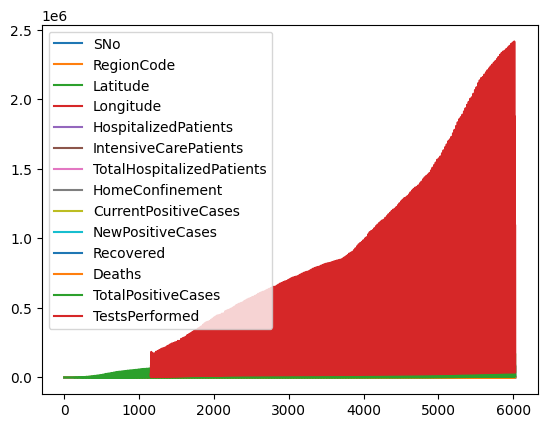

In [62]:
data.plot()

In [63]:
#We can use median to assign none values becaue we have left skewed data
median_value = data['TestsPerformed'].median()

In [64]:
data["TestsPerformed"] = data.TestsPerformed.fillna(median_value)

In [65]:
data.isnull().sum()

SNo                          0
Date                         0
Country                      0
RegionCode                   0
RegionName                   0
Latitude                     0
Longitude                    0
HospitalizedPatients         0
IntensiveCarePatients        0
TotalHospitalizedPatients    0
HomeConfinement              0
CurrentPositiveCases         0
NewPositiveCases             0
Recovered                    0
Deaths                       0
TotalPositiveCases           0
TestsPerformed               0
dtype: int64

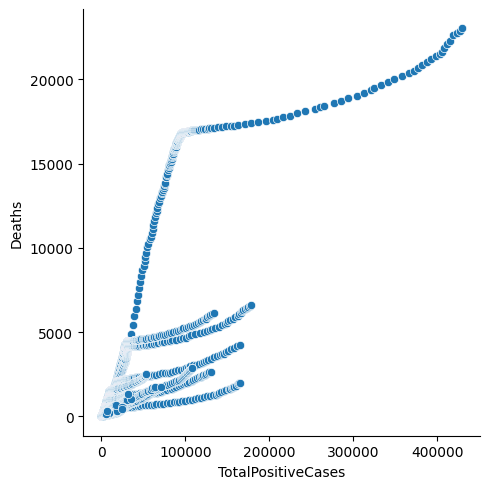

In [66]:
sns.relplot(x="TotalPositiveCases", y="Deaths", data=data)

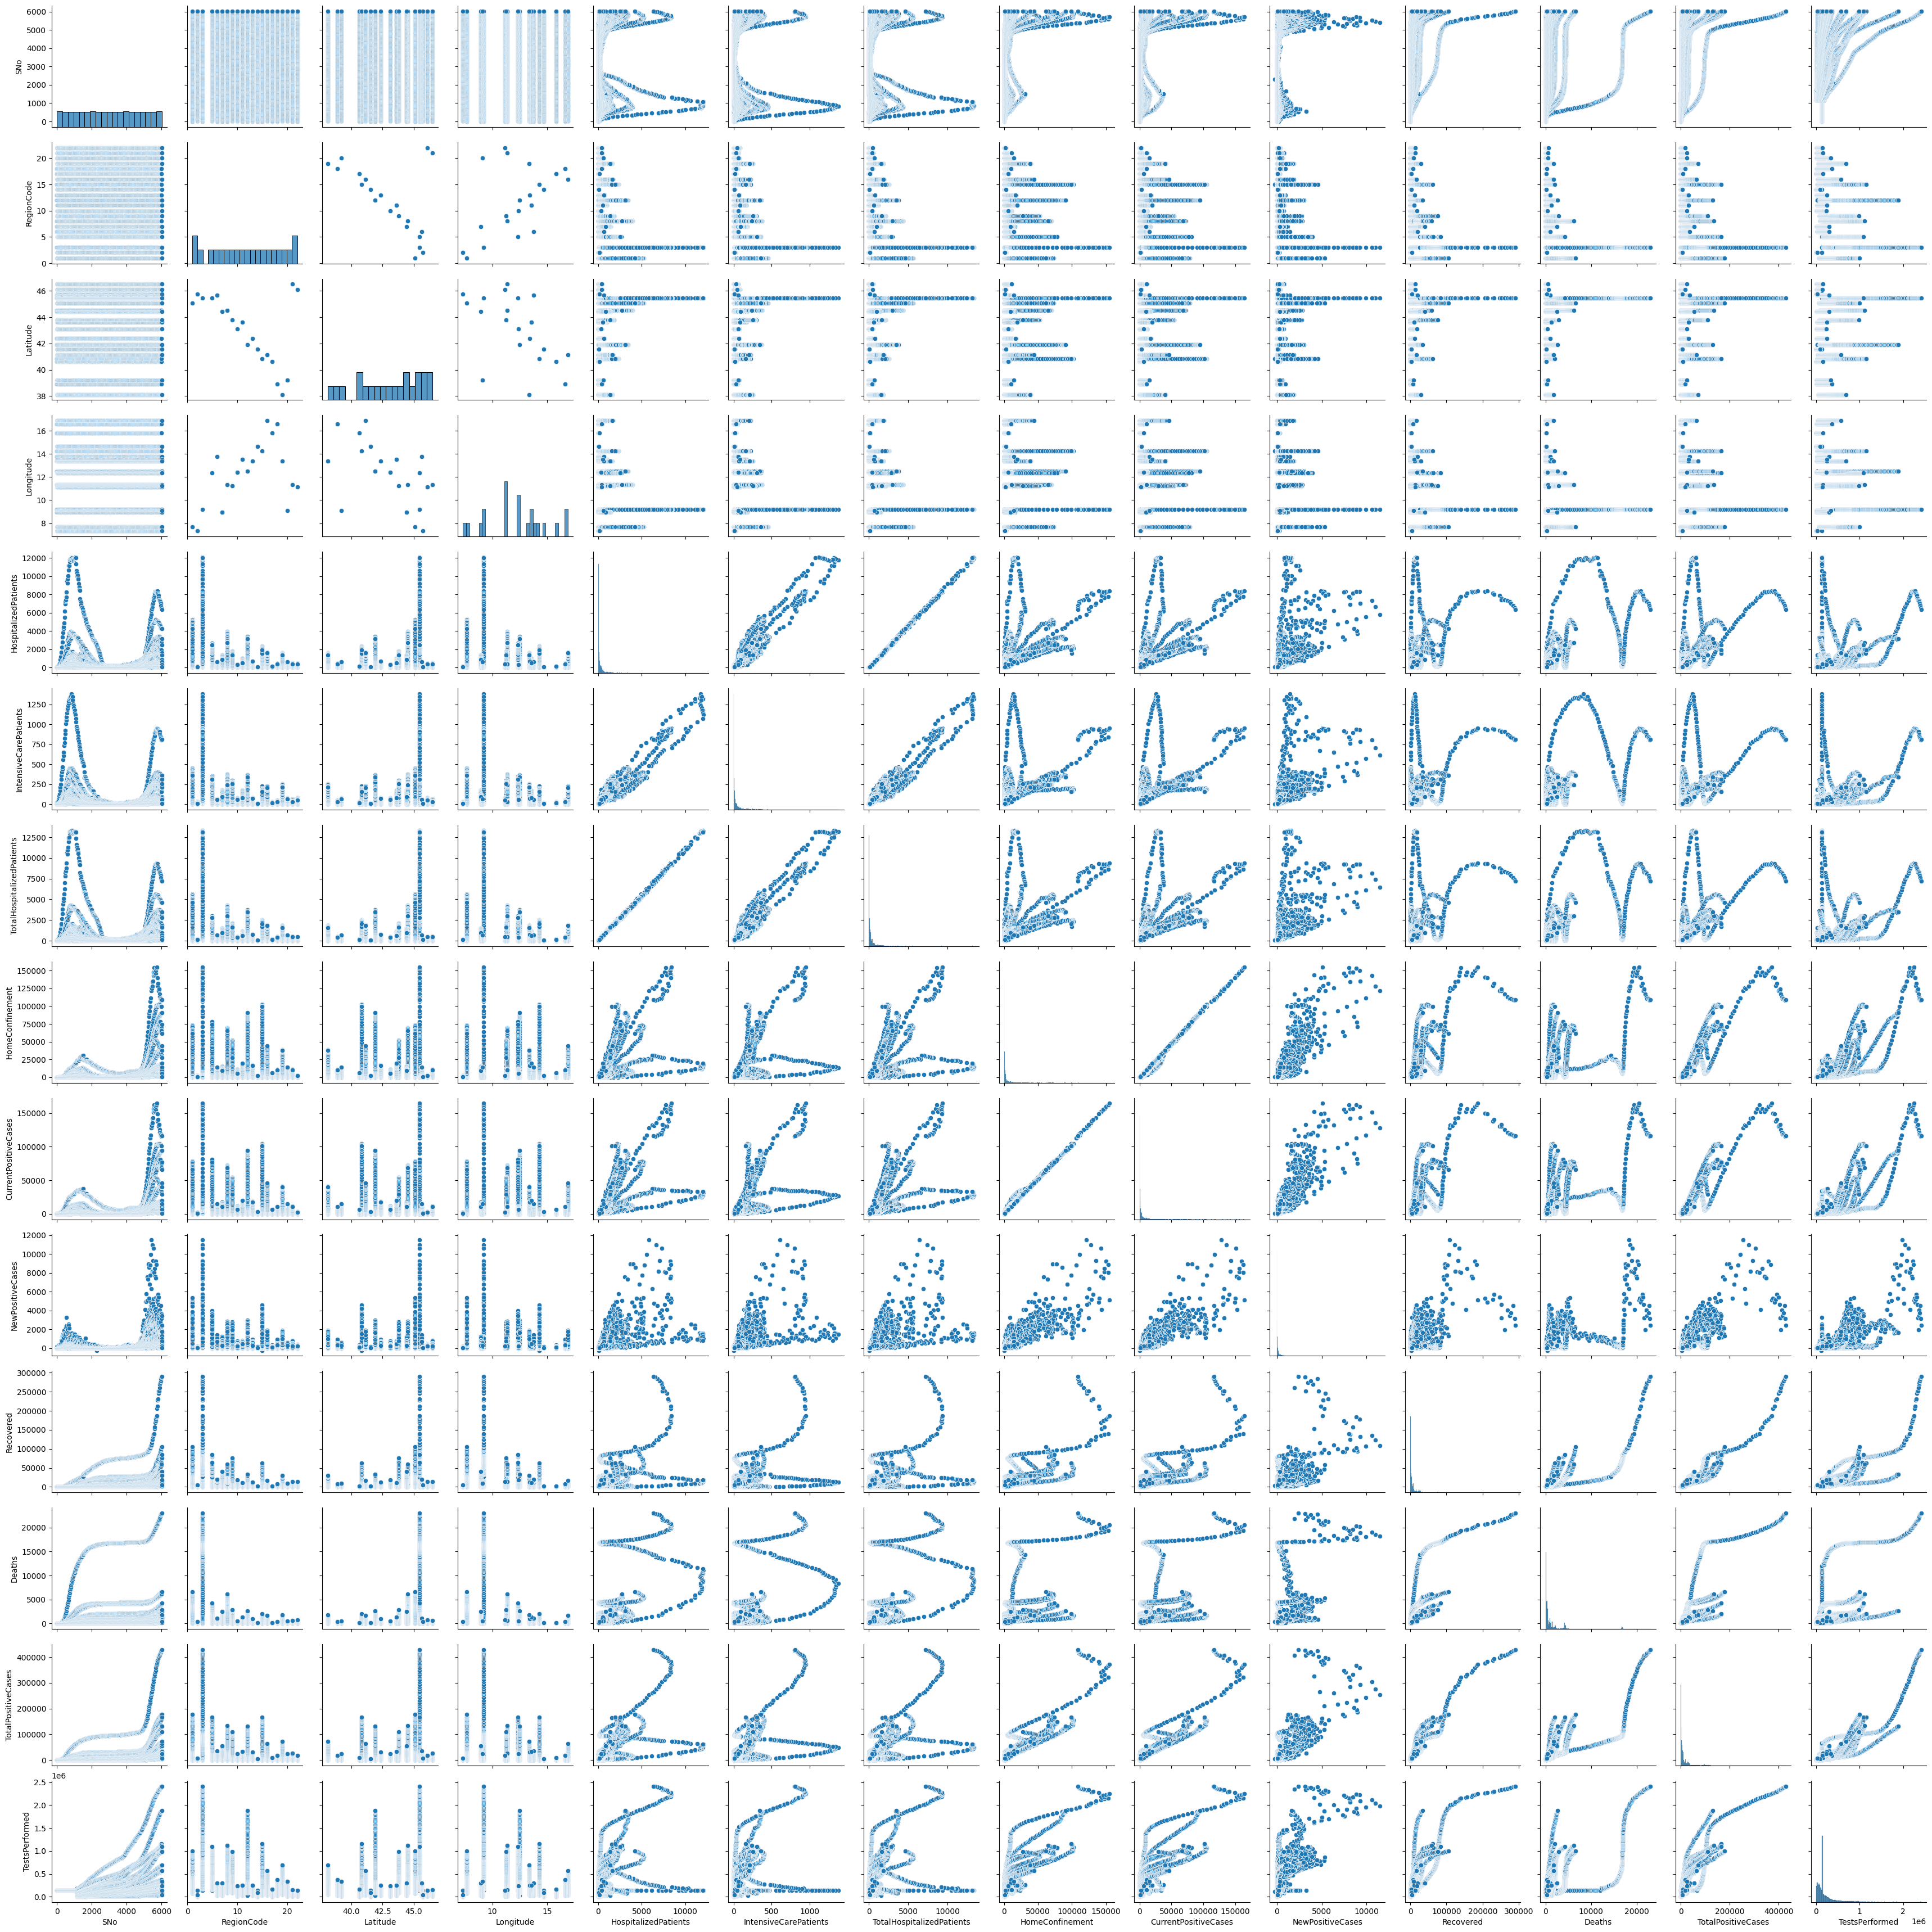

In [67]:
sns.pairplot(data)

In [68]:
data = data.drop(['Date','Country','SNo'],axis=1)

In [69]:
data.tail(10)

,RegionCode,RegionName,Latitude,Longitude,HospitalizedPatients,IntensiveCarePatients,TotalHospitalizedPatients,HomeConfinement,CurrentPositiveCases,NewPositiveCases,Recovered,Deaths,TotalPositiveCases,TestsPerformed
6017,21,P.A. Bolzano,46.499335,11.356624,410,32,442,10479,10921,248,13862,578,25361,152109.0
6018,22,P.A. Trento,46.068935,11.121231,414,48,462,1955,2417,216,13995,691,17103,141146.0
6019,1,Piemonte,45.073274,7.680687,4239,359,4598,61440,66038,1269,105127,6623,177788,1000611.0
6020,16,Puglia,41.125596,16.867367,1613,203,1816,44018,45834,1789,16795,1712,64341,567857.0
6021,20,Sardegna,39.215312,9.110616,616,64,680,14280,14960,293,8695,531,24186,333552.0
6022,19,Sicilia,38.115697,13.362357,1367,213,1580,38166,39746,1022,29984,1759,71489,692062.0
6023,9,Toscana,43.769231,11.255889,1360,252,1612,27587,29199,753,76331,2867,108397,983103.0
6024,10,Umbria,43.106758,12.388247,332,60,392,5673,6065,234,18619,460,25144,231538.0
6025,2,Valle d'Aosta,45.737503,7.320149,102,8,110,877,987,34,5406,333,6726,34644.0
6026,5,Veneto,45.434905,12.338452,2508,308,2816,73988,76804,3444,84235,4210,165249,1090932.0


In [70]:
from sklearn.linear_model import LinearRegression

In [71]:
data = pd.get_dummies(data,columns=['RegionName'])

In [72]:
data['TestsPerformed'].fillna(data['TestsPerformed'].median(), inplace=True)

In [73]:
y = data[['Deaths']]
x = data.drop('Deaths', axis=1)

In [74]:
data.isnull().sum()

RegionCode                          0
Latitude                            0
Longitude                           0
HospitalizedPatients                0
IntensiveCarePatients               0
TotalHospitalizedPatients           0
HomeConfinement                     0
CurrentPositiveCases                0
NewPositiveCases                    0
Recovered                           0
Deaths                              0
TotalPositiveCases                  0
TestsPerformed                      0
RegionName_Abruzzo                  0
RegionName_Basilicata               0
RegionName_Calabria                 0
RegionName_Campania                 0
RegionName_Emilia-Romagna           0
RegionName_Friuli Venezia Giulia    0
RegionName_Lazio                    0
RegionName_Liguria                  0
RegionName_Lombardia                0
RegionName_Marche                   0
RegionName_Molise                   0
RegionName_P.A. Bolzano             0
RegionName_P.A. Trento              0
RegionName_P

In [75]:
lm = LinearRegression()
model = lm.fit(x,y)

In [76]:
model.score(x,y)
# Veri bölünmedi, test ve train olarak ayrılmadı
# Güvenilir bir score değil.

0.9999999962516327

In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6027 entries, 0 to 6026
Data columns (total 34 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   RegionCode                        6027 non-null   int64  
 1   Latitude                          6027 non-null   float64
 2   Longitude                         6027 non-null   float64
 3   HospitalizedPatients              6027 non-null   int64  
 4   IntensiveCarePatients             6027 non-null   int64  
 5   TotalHospitalizedPatients         6027 non-null   int64  
 6   HomeConfinement                   6027 non-null   int64  
 7   CurrentPositiveCases              6027 non-null   int64  
 8   NewPositiveCases                  6027 non-null   int64  
 9   Recovered                         6027 non-null   int64  
 10  Deaths                            6027 non-null   int64  
 11  TotalPositiveCases                6027 non-null   int64  
 12  TestsP

In [78]:
model.predict([[343, 671, 287, 893, 739, 529, 964, 418, 321, 983, 219, 542, 810, 765, 608, 485, 950, 300, 257, 752, 844, 634, 190, 589, 453, 870, 377, 234, 706, 927, 651, 502,321]])
# Değerler rastgele olduğu için böyle bir sonuç çıktı daha az parametre ile daha uygun değerler verilebilirdi.
# Bu sadece deneme amaçlıdır.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[-1739.99748826]])

In [54]:
data_error = pd.DataFrame()

In [79]:
data_error['y'] = y

In [80]:
data_error

,y
0,0
1,0
2,0
3,0
4,0
...,...
6022,1759
6023,2867
6024,460
6025,333


In [82]:
y_guess = model.predict(x)

In [83]:
data_error['Guess']=y_guess

In [84]:
data_error.tail(10)

,y,Guess
6017,578,578.002893
6018,691,691.003812
6019,6623,6623.017699
6020,1712,1711.980669
6021,531,530.994745
6022,1759,1758.987817
6023,2867,2866.956273
6024,460,460.004174
6025,333,333.002594
6026,4210,4209.998871


In [85]:
data_error['error'] = y-y_guess

In [86]:
data_error.head(10)

,y,Guess,error
0,0,-0.000671,0.000671
1,0,-0.001523,0.001523
2,0,-0.003297,0.003297
3,0,0.005070,-0.005070
4,0,0.005707,-0.005707
5,0,-0.000437,0.000437
6,0,0.010443,-0.010443
7,0,-0.002557,0.002557
8,6,6.011876,-0.011876
9,0,-0.000168,0.000168


In [87]:
data_error['squared_error'] = data_error['error']**2

In [88]:
data_error['abs_error'] = np.abs(data_error['error'])

In [104]:
data_error['percent_error'] = np.abs((y-y_guess)/y*10**5)

In [105]:
data_error.tail()

,y,Guess,error,squared_error,abs_error,percent_error
6022,1759,1758.987817,0.012183,0.000148,0.012183,0.692634
6023,2867,2866.956273,0.043727,0.001912,0.043727,1.525186
6024,460,460.004174,-0.004174,0.000017,0.004174,0.907420
6025,333,333.002594,-0.002594,0.000007,0.002594,0.778957
6026,4210,4209.998871,0.001129,0.000001,0.001129,0.026826


In [106]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error

In [107]:
mean_squared_error(y,y_guess)

0.04244136202890776

In [108]:
mean_absolute_error(y,y_guess)

0.009291596781566543

In [109]:
mean_absolute_percentage_error(y,y_guess)

999861483204.2684